# Introduction to Artificial Intelligence - Homework04
- NETID:
- Name:

This assignment covers the following topics:
- Perceptrons

Complete all sections. Some questions will require written answers, while others will involve coding. Be sure to run your code cells to verify your solutions.

We're going to create a perceptron to then use to classify on the iris data set. 

**1.) Finish the perceptron class outlined below by filling in the training, or fit, function.**

In [6]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    nu : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, nu=0.02, epochs=10):
        self.nu = nu
        self.epochs = epochs

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            pass
           # TODO: for each sample in your training data, classify it
           # and for each incorrect sample found, update the weights
           # my implementation was about 7 lines
            
        return self

    def weighted_sum(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

In the above code, you need to implement the perceptron update function in order to fit your perceptron to the dataset.
The below code will load the iris dataset into a Pandas dataframe 

In [7]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
data = np.hstack((X, y[:, np.newaxis]))

labels = iris.target_names
features = iris.feature_names

df = pd.DataFrame(data, columns=iris.feature_names+['label'])
df.label = df.label.map({k:v for k,v in enumerate(labels)})
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


The code below takes the iris dataset and removes all of the samples for the class virginica.

**2.) Why do we need to remove one of the three classes from the data set?**

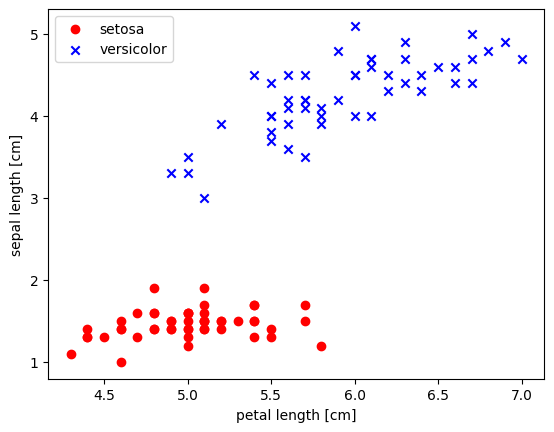

In [8]:
import matplotlib.pyplot as plt

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.show()

A plot of the two classes in our data set is shown above. 

**3.) What property do these two classes have that indicates we can use a perceptron for classification?**

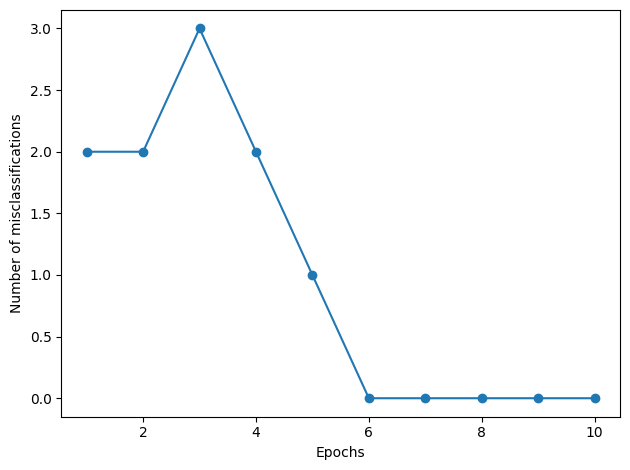

In [9]:
perceptron = Perceptron(nu=0.2, epochs=10)

perceptron.fit(X, y)

plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

/var/folders/2m/zt75k_js249d_qcmywz2vb0r0000gp/T/ipykernel_54177/1601578329.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


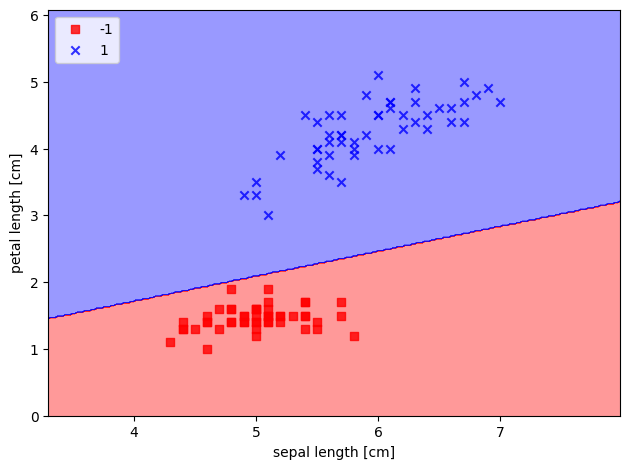

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Above we can see a plot for the learned decision boundary from a fully trained perceptron, pretty neat!

Recall the boolean XOR function and look at the plot for it ![XOR Plot](https://www.researchgate.net/profile/Brian-Spears/publication/322048911/figure/fig4/AS:667820685807618@1536232267250/The-exclusive-or-XOR-function-is-a-nonlinear-function-that-returns-0-when-its-two.png)

**4.) Would a single perceptron be able to classify the XOR function?**

Feel free to skim this [blogpost](https://www.geeksforgeeks.org/implementation-of-perceptron-algorithm-for-xor-logic-gate-with-2-bit-binary-input/) for a solution to this problem! It turns out you can do it using more than one perceptron chained together! This idea is the impetus behind the creation of deep learning, which we'll do a deep dive into in the final third of the semester.